# Compute Gradients of a Function using Automatic Differentiation on Tensorflow
Sep 17, 2018. Guorui Shen, guorui233@outlook.com

For those functions that can be represented explicitly via the basic functions defined in Tensorflow (such as `tf.sin(x)`, `tf.cos(x)` and so on), there are two kinds of methods that can be called to calculate their derivatives
+ `tf.gradients(fun(x), [x])`,
+ `tf.train.AdamOptimizer().compute_gradients(fun(x), var_list=[x])`.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## The Gradients of a Differentiable Function

In [2]:
def fun(x):
    return tf.sin(x)
def grad(x):
    return np.cos(x)

In [3]:
T = np.arange(0, 2*np.pi, .1)
t = np.arange(0, 2*np.pi, 0.5)
print t

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]


In [4]:
x = tf.Variable(t, name='x')
gradient_1 = tf.gradients(fun(x), [x])
gradient_2 = tf.train.AdamOptimizer().compute_gradients(fun(x), var_list=[x])

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
g1, g2 = sess.run([gradient_1, gradient_2])

In [6]:
print g2[0][0]
print g2[0][1]
print t

[ 1.          0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362
 -0.9899925  -0.93645669 -0.65364362 -0.2107958   0.28366219  0.70866977
  0.96017029]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]


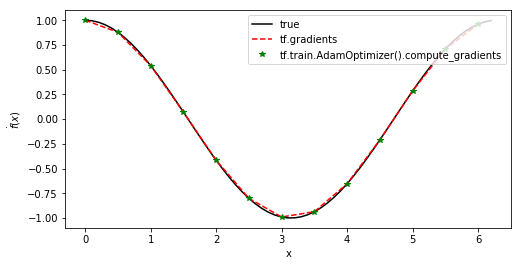

In [7]:
plt.figure(figsize=(8,4))
plt.plot(T, grad(T), 'k-', t, g1[0], 'r--', t, g2[0][0], 'g*')
plt.xlabel('x')
plt.ylabel('$\dot{f}(x)$')
plt.legend(['true', 'tf.gradients', 'tf.train.AdamOptimizer().compute_gradients'], loc="upper right")

## The Gradients of a Non-differentiable Function

In [8]:
t = np.arange(-1, 1, 0.1)

In [9]:
def pwl(z):
    return tf.nn.relu(z)
z = tf.Variable(t, name = 'z')
pwl_approx_grad = tf.gradients(pwl(z), [z])

In [10]:
sess.run(tf.global_variables_initializer())
g3 = sess.run(pwl_approx_grad)

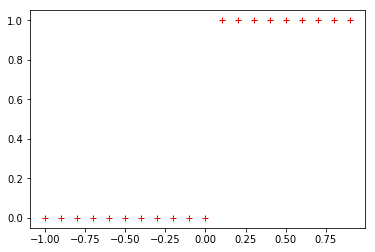

In [11]:
plt.plot(t, g3[0], 'r+')